<a href="https://colab.research.google.com/github/AdityaJaiswal14/AI-Powered-Demand-Forecasting/blob/main/FeynnLabsReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/train (1).csv/train.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
df_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

df_sales = df_sales.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

df_sales['ds'] = pd.to_datetime(df_sales['ds'])

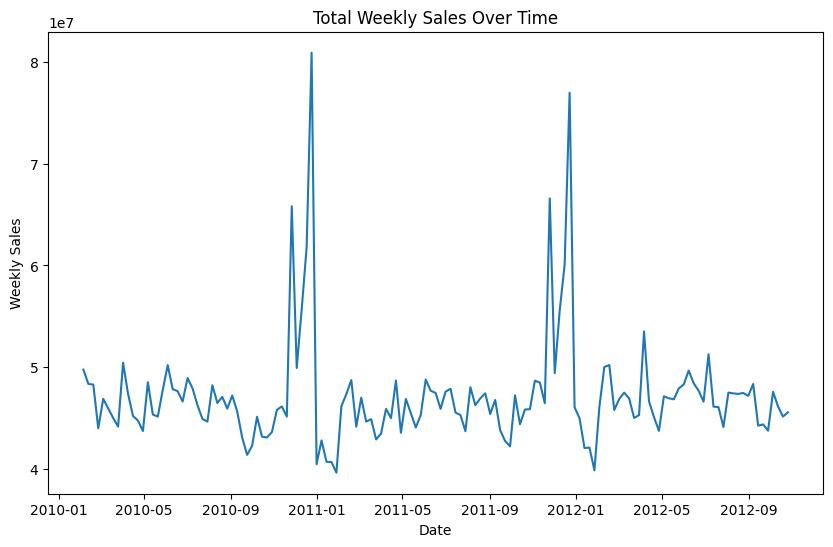

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df_sales['ds'], df_sales['y'])
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [8]:
model = Prophet()

model.fit(df_sales)

future = model.make_future_dataframe(periods=52, freq='W')

forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rz07qji/zd4rjfbr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rz07qji/rq9eydph.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90060', 'data', 'file=/tmp/tmp1rz07qji/zd4rjfbr.json', 'init=/tmp/tmp1rz07qji/rq9eydph.json', 'output', 'file=/tmp/tmp1rz07qji/prophet_model0laey8ni/prophet_model-20240908145006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


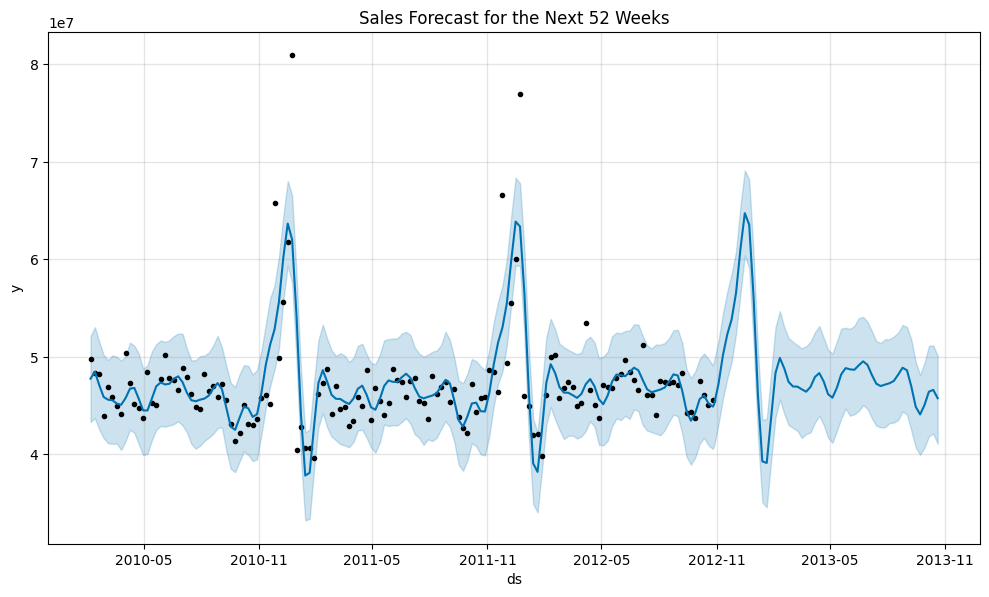

In [9]:
model.plot(forecast)
plt.title('Sales Forecast for the Next 52 Weeks')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

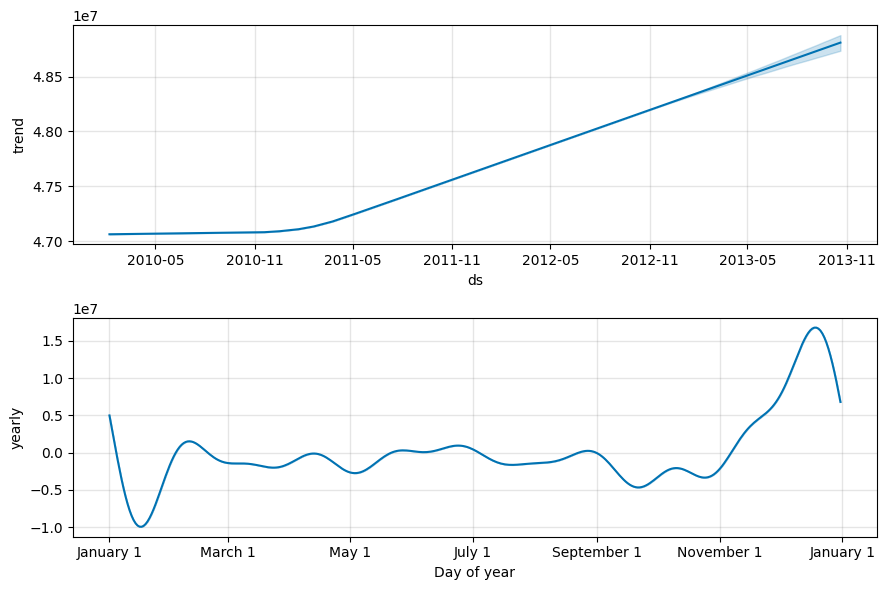

In [10]:
model.plot_components(forecast)
plt.show()

In [11]:
train = df_sales[:-52]
test = df_sales[-52:]

In [12]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rz07qji/hxjov4go.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1rz07qji/e5p3ufgf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92592', 'data', 'file=/tmp/tmp1rz07qji/hxjov4go.json', 'init=/tmp/tmp1rz07qji/e5p3ufgf.json', 'output', 'file=/tmp/tmp1rz07qji/prophet_modellt8t081j/prophet_model-20240908145603.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:56:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:03 - cmdstanpy - INFO - Chai

In [13]:
future_test = model.make_future_dataframe(periods=52, freq='W')
forecast_test = model.predict(future_test)

predicted_test = forecast_test['yhat'][-52:]

In [14]:
mae = mean_absolute_error(test['y'], predicted_test)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3385352.270404679


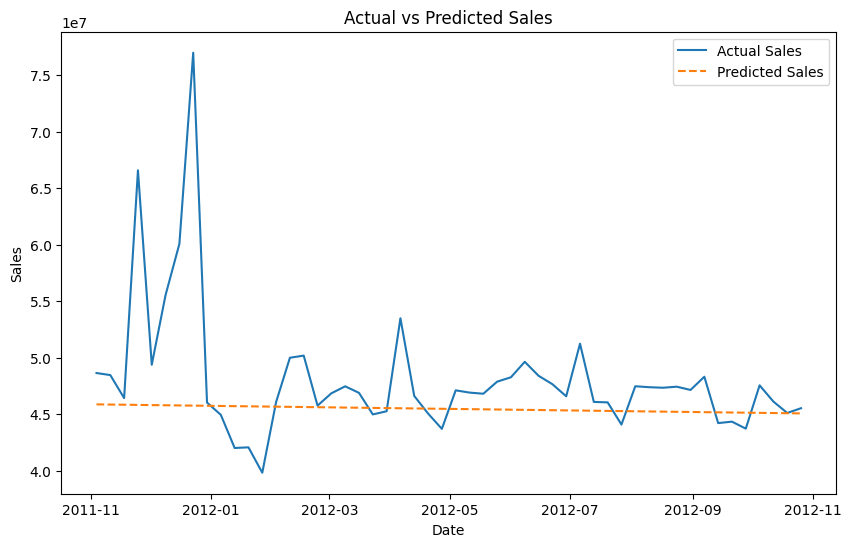

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], test['y'], label='Actual Sales')
plt.plot(test['ds'], predicted_test, label='Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()